**<h1>CASO 4</h1>**

![especificaciones](huch.jpeg)


In [180]:
import pandas as pd
from sklearn.datasets import load_iris

irisdata = load_iris(as_frame=True)

# Convierte irisdata.data en un DataFrame
dfiris = pd.DataFrame(irisdata.data, columns=irisdata.feature_names)

# Ahora, dfiris es un DataFrame de pandas que contiene los datos de California Housing
dfiris.head()

df = irisdata.frame

In [181]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [182]:
# Renombra las columnas con guiones bajos en lugar de espacios
df.columns = df.columns.str.replace(' ', '_')

# Verifica los nombres de las columnas
print(df.columns)

Index(['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)',
       'petal_width_(cm)', 'target'],
      dtype='object')


In [183]:
# Vamos a crear los bins de datos para transformar nuestros valores continuos en categorías:
df["sepal_width_cat"] = pd.qcut(df["sepal_width_(cm)"], 3, retbins=False, labels=[1, 2, 3])
df["sepal_width_cat"]

0      3
1      2
2      2
3      2
4      3
      ..
145    2
146    1
147    2
148    3
149    2
Name: sepal_width_cat, Length: 150, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [184]:
# Vamos a crear los bins de datos para transformar nuestros valores continuos en categorías:
df["sepal_length_cat"] = pd.qcut(df["sepal_length_(cm)"], 3, retbins=False, labels=[1, 2, 3])
df["sepal_length_cat"]

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    2
147    3
148    2
149    2
Name: sepal_length_cat, Length: 150, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [185]:
y = df.target
X = df.drop([ 'sepal_width_cat','sepal_width_(cm)'], axis = 1)

In [186]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [187]:
# Escalado de características para la clasificación
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [188]:
X_train


array([[-1.01827123, -1.39338902, -1.3621769 , -1.2725257 , -1.15801628],
       [-0.7730102 , -1.33550342, -1.49647603, -1.2725257 , -1.15801628],
       [-0.03722712,  0.74837808,  0.92090833,  1.20613306,  0.12612059],
       [ 0.20803391,  0.4010645 ,  0.51801093, -0.03319632,  0.12612059],
       [ 1.06644751,  0.51683569,  0.3837118 , -0.03319632,  1.41025745],
       [-0.52774918, -1.45127462, -1.09357864, -1.2725257 , -1.15801628],
       [-0.52774918, -1.33550342, -1.3621769 , -1.2725257 , -1.15801628],
       [-0.40511866, -0.06202028, -0.28778385, -0.03319632,  0.12612059],
       [ 0.57592545,  0.74837808,  0.3837118 ,  1.20613306,  0.12612059],
       [ 0.69855596,  0.97992047,  0.7866092 ,  1.20613306,  1.41025745],
       [ 0.94381699,  0.3431789 ,  0.24941267, -0.03319632,  1.41025745],
       [ 1.67960008,  1.32723405,  1.72670311,  1.20613306,  1.41025745],
       [-0.15985763,  0.2274077 ,  0.11511354, -0.03319632,  0.12612059],
       [ 2.17012213,  1.61666204,  1.1

In [189]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [190]:
# Tras ajustar el KNeighborsClassifier, podemos predecir las clases de los datos de prueba:
y_pred = classifier.predict(X_test)

In [191]:
acc =  classifier.score(X_test, y_test)
print(acc) # 0.6191860465116279

1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



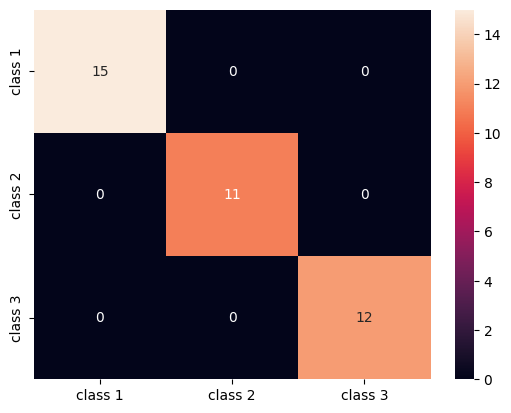

In [192]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

[[5.1 0.2]
 [4.9 0.2]
 [4.7 0.2]
 [4.6 0.2]
 [5.  0.2]
 [5.4 0.4]
 [4.6 0.3]
 [5.  0.2]
 [4.4 0.2]
 [4.9 0.1]
 [5.4 0.2]
 [4.8 0.2]
 [4.8 0.1]
 [4.3 0.1]
 [5.8 0.2]
 [5.7 0.4]
 [5.4 0.4]
 [5.1 0.3]
 [5.7 0.3]
 [5.1 0.3]
 [5.4 0.2]
 [5.1 0.4]
 [4.6 0.2]
 [5.1 0.5]
 [4.8 0.2]
 [5.  0.2]
 [5.  0.4]
 [5.2 0.2]
 [5.2 0.2]
 [4.7 0.2]
 [4.8 0.2]
 [5.4 0.4]
 [5.2 0.1]
 [5.5 0.2]
 [4.9 0.2]
 [5.  0.2]
 [5.5 0.2]
 [4.9 0.1]
 [4.4 0.2]
 [5.1 0.2]
 [5.  0.3]
 [4.5 0.3]
 [4.4 0.2]
 [5.  0.6]
 [5.1 0.4]
 [4.8 0.3]
 [5.1 0.2]
 [4.6 0.2]
 [5.3 0.2]
 [5.  0.2]
 [7.  1.4]
 [6.4 1.5]
 [6.9 1.5]
 [5.5 1.3]
 [6.5 1.5]
 [5.7 1.3]
 [6.3 1.6]
 [4.9 1. ]
 [6.6 1.3]
 [5.2 1.4]
 [5.  1. ]
 [5.9 1.5]
 [6.  1. ]
 [6.1 1.4]
 [5.6 1.3]
 [6.7 1.4]
 [5.6 1.5]
 [5.8 1. ]
 [6.2 1.5]
 [5.6 1.1]
 [5.9 1.8]
 [6.1 1.3]
 [6.3 1.5]
 [6.1 1.2]
 [6.4 1.3]
 [6.6 1.4]
 [6.8 1.4]
 [6.7 1.7]
 [6.  1.5]
 [5.7 1. ]
 [5.5 1.1]
 [5.5 1. ]
 [5.8 1.2]
 [6.  1.6]
 [5.4 1.5]
 [6.  1.6]
 [6.7 1.5]
 [6.3 1.3]
 [5.6 1.3]
 [5.5 1.3]
 [5.5 1.2]

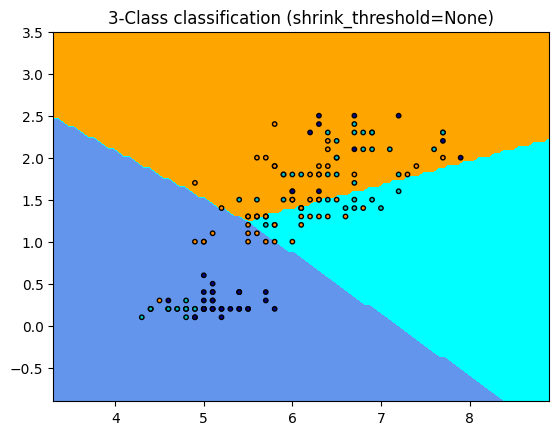

In [193]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestCentroid

# Suponiendo que X es un DataFrame de pandas
X_2d = X[['sepal_length_(cm)', 'petal_width_(cm)']].to_numpy()
y = df["sepal_width_cat"]
# Ahora X_2d será un arreglo NumPy bidimensional con las dos variables seleccionadas
print(X_2d)

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "c", "darkblue"])

for shrinkage in [None]:
    # we create an instance of Nearest Centroid Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X_2d, y)
    y_pred = clf.predict(X_2d)
    print(shrinkage, np.mean(y == y_pred))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X_2d, cmap=cmap_light, ax=ax, response_method="predict"
    )

    # Plot also the training points
    plt.scatter(X_2d[:, 0],X_2d[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=10)
    plt.title("3-Class classification (shrink_threshold=%r)" % shrinkage)
    plt.axis("tight")

plt.show()
